In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [108]:
df_train = pd.read_csv("./files/train.csv" , sep = "," , encoding = 'utf-8')


C:\Users\Adam\AppData\Local\Temp\ipykernel_32428\953991890.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./files/train.csv" , sep = "," , encoding = 'utf-8')


Test działania

In [109]:
df_train.shape
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [110]:
# drop duplikatów
df_train.drop_duplicates(subset="ID", inplace=True)

In [111]:
# test pliku 
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [112]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [113]:
for i in df_train.columns:
    print(df_train[i].value_counts())
    print('*'*50)

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
**************************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
**************************************************
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64
*

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

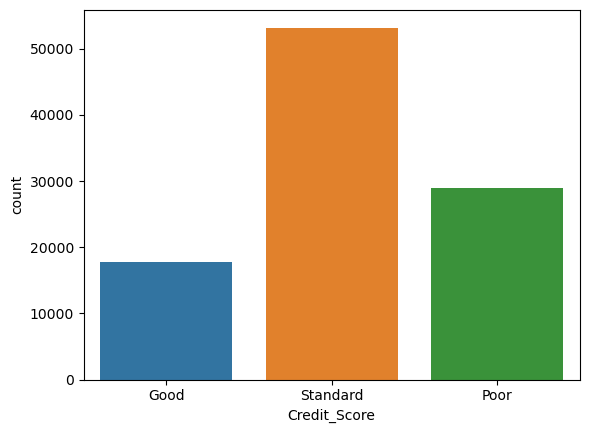

In [114]:
sns.countplot(df_train['Credit_Score'])

In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [116]:
FeaturesToConvert = ['Age', 'Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance']

# Poszukiwanie błędów
def check():
    for feature in FeaturesToConvert:
        uniques = df_train[feature].unique()
        print('Feature:', '\n', feature, '\n', uniques, '\n', '--'*40, '\n')


# Usuwanie błędów
# 1. Usunięcie znaków '-', '_'
# 2. Zamiana pustych wartości na NaN
# 3. Zamiana typów danych na float64
def editData():
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].str.strip('-_')
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].replace({'':np.nan})
    for feature in FeaturesToConvert:
        df_train[feature] = df_train[feature].astype('float64')
    
editData()

# uzupełnij braki średnią

df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(method='pad')

# puste na 0 Changed_Credit_Limit,  Num_of_Delayed_Payment 
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(0)
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(0)
check()

Feature: 
 Age 
 [  23.  500.   28. ... 4808. 2263. 1342.] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 [4.000e+00 1.000e+00 3.000e+00 9.670e+02 1.000e+02 0.000e+00 2.000e+00
 7.000e+00 5.000e+00 6.000e+00 8.000e+00 9.000e+00 1.464e+03 6.220e+02
 3.520e+02 4.720e+02 1.017e+03 9.450e+02 1.460e+02 5.630e+02 3.410e+02
 4.440e+02 7.200e+02 1.485e+03 4.900e+01 7.370e+02 1.106e+03 4.660e+02
 7.280e+02 3.130e+02 8.430e+02 5.970e+02 6.170e+02 1.190e+02 6.630e+02
 6.400e+02 9.200e+01 1.019e+03 5.010e+02 1.302e+03 3.900e+01 7.160e+02
 8.480e+02 9.310e+02 1.214e+03 1.860e+02 4.240e+02 1.001e+03 1.110e+03
 1.152e+03 4.570e+02 1.433e+03 1.187e+03 5.200e+01 1.480e+03 1.047e+03
 1.035e+03 1.347e+03 3.300e+01 1.930e+02 6.990e+02 3.290e+02 1.451e+03
 4.840e+02 1.3

Kodowanie zmiennych kategorycznych

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
# Tworzenie obiektu enkodera
le = LabelEncoder()

df_train.Occupation = le.fit_transform(df_train.Occupation)


In [119]:
# Zamiana miesięcy na wart. liczbowe
d = {
    'January':1, 
    'February':2, 
    'March':3, 
    'April':4, 
    'May':5, 
    'June':6, 
    'July':7, 
    'August':8, 
    'September':9, 
    'October':10, 
    'November':11, 
    'December':12 
    }
df_train.Month = df_train.Month.map(d)


In [120]:
# Sprawdzenie poprawności
print(df_train.Month)

# usunięcie zbędnych kolumn - Name, Customer_id, SSN

df_train.drop(columns = ['Name', 'Customer_ID', 'SSN'])

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,1,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,2,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,3,500.0,12,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,4,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,5,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,4,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,5,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,6,25.0,9,39628.99,3359.415833,4,6,5729,2.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [121]:
# cols = ['Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan']

cols = ['Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)

df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,0,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,3,809.98,26.822620,22 Years and 1 Months,1,49.574949,80.415295,3,312.494089,0
1,0x1603,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,31.944960,NaN,1,49.574949,118.280222,4,284.629162,0
2,0x1604,CUS_0xd40,2,Aaron Maashoh,500.0,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,28.609352,22 Years and 3 Months,1,49.574949,81.699521,5,331.209863,0
3,0x1605,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.458074,6,223.451310,0
4,0x1606,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153,2,341.489231,0


In [122]:
df_train['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [123]:
df_train['Credit_History_Age'] = (12*(df_train['Credit_History_Age'].str.split(' ', expand=True)[0].astype(float)) + (df_train['Credit_History_Age'].str.split(' ', expand= True)[3].astype(float)))


In [124]:
df_train['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [125]:
# drop nanów

df_train = df_train.dropna()

In [126]:
# Sprawdzenie poprawności działania
df_train['Credit_History_Age'].head()

0    265.0
2    267.0
3    268.0
4    269.0
5    270.0
Name: Credit_History_Age, dtype: float64

In [128]:
# Usunięcie zmiennych odstających
# Drop outlier by IQR calculation - Annual_Income, Monthly_Inhand_Salary, Monthly_Balance, Amount_invested_monthly, Total_EMI_per_month	
# function way
# quantFeatures = ['Age', 'Annual_Income', 'Outstanding_Debt', 'Monthly_Income_Salary', 'Monthly_Balance', 'Amount_invested_monthly', 'Total_EMI_per_month']
# def editQuant():
#     for feature in quantFeatures:
#         Q1 = df_train.feature.quantile(0.25)
#         Q3 = df_train.feature.quantile(0.75)
#         IQR = Q3 - Q1
#         df_train = df_train.drop(df_train.loc[df_train[feature] > (Q3 + 1.5 *
#         IQR)].index)
#         df_train = df_train.drop(df_train.loc[df_train[feature] < (Q1 -
#         1.5 * IQR)].index)
    
# editQuant()


Q1 = df_train.Annual_Income.quantile(0.25)
Q3 = df_train.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_train = df_train.drop(df_train.loc[df_train['Annual_Income'] > (Q3 + 1.5 *
IQR)].index)
df_train = df_train.drop(df_train.loc[df_train['Annual_Income'] < (Q1 -
1.5 * IQR)].index)

In [133]:
# przerobione dane: Annual_Income, Monthly_Inhand_Salary, Monthly_Balance, Amount_invested_monthly, Total_EMI_per_month	
Q1 = df_train.Total_EMI_per_month.quantile(0.25)
Q3 = df_train.Total_EMI_per_month.quantile(0.75)
IQR = Q3 - Q1
df_train = df_train.drop(df_train.loc[df_train['Total_EMI_per_month'] > (Q3 + 1.5 *
IQR)].index)
df_train = df_train.drop(df_train.loc[df_train['Total_EMI_per_month'] < (Q1 -
1.5 * IQR)].index)

In [134]:
len(df_train)
# usuwanie nieistotnych kolumn

irrelevant = ['ID','Customer_ID','Name','SSN']
df_train = df_train.drop(irrelevant, axis=1)
df_train.columns

# usunięcie nadwiekowych osób
for i in df_train.Age.values:
    if (i > 118 or i< 0 ):
        df_train.Age.replace(i, np.median(df_train.Age), inplace=True)

In [135]:
# Standaryzacja i normalizacja zmiennych numerycznych
scaler = StandardScaler() # scaler = StandardScaler()MinMaxScaler

col_float = ['Age', 'Annual_Income', 'Delay_from_due_date',
'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
'Total_EMI_per_month', 'Monthly_Balance']

for i in df_train[col_float]:
    df_train[i] = scaler.fit_transform(df_train[[i]])

print(df_train.head())

   Month       Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      0 -0.917979          12      -0.695433            1824.843333   
2      2  0.035940          12      -0.695433            1824.843333   
3      3 -0.917979          12      -0.695433            1824.843333   
4      4 -0.917979          12      -0.695433            1824.843333   
5      5 -0.917979          12      -0.695433            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3          4.0   
2                  3                4              3          4.0   
3                  3                4              3          4.0   
4                  3                4              3          4.0   
5                  3                4              3          4.0   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...  ...           3   
2  Aut

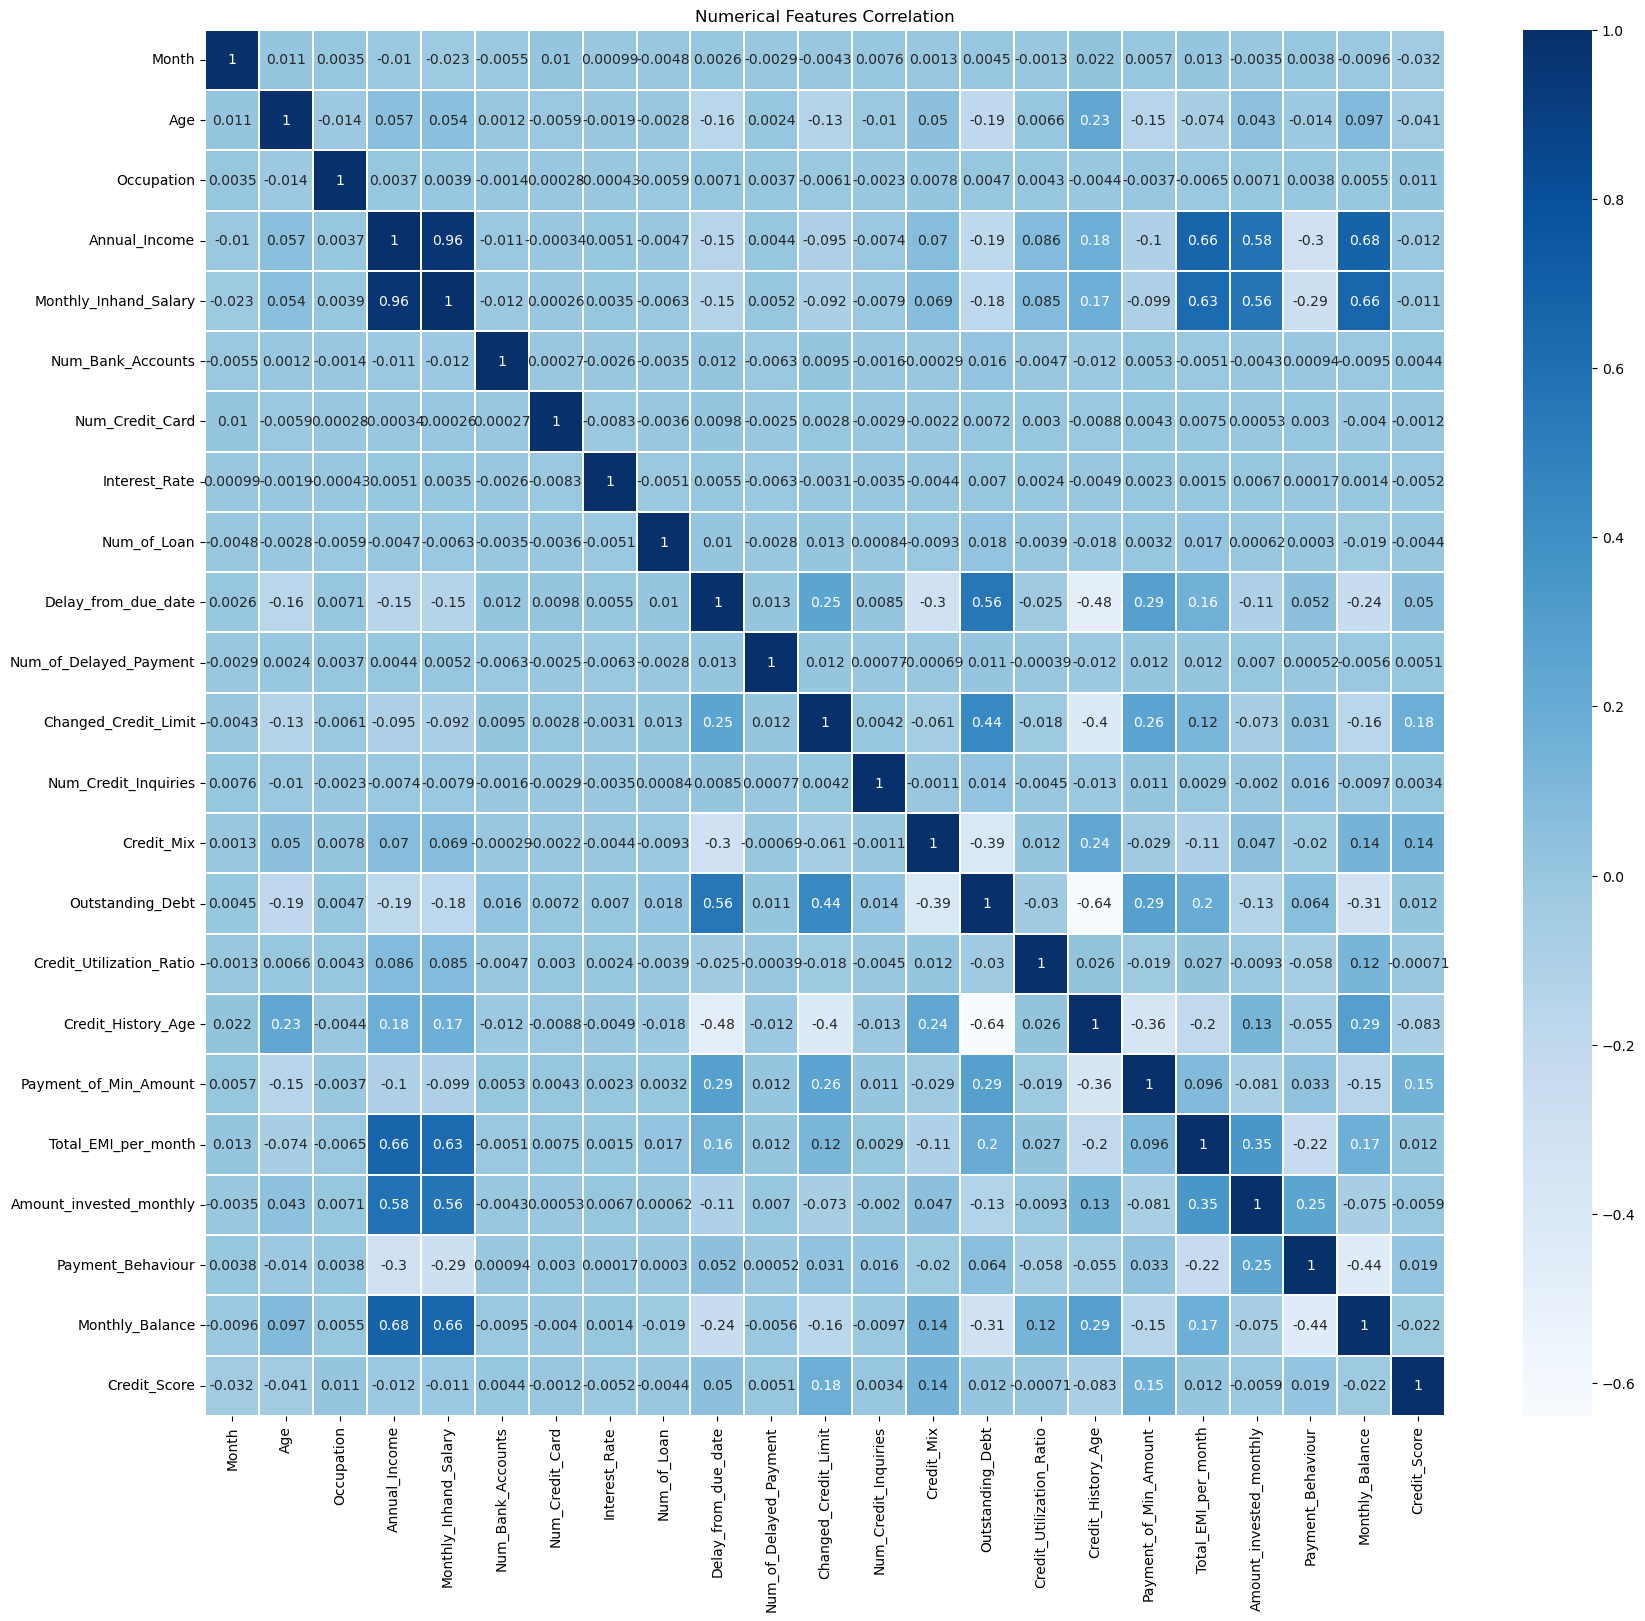

In [143]:
# Korelacje cech numerycznych
features = ['Annual_Income', 'Age', 'Monthly_Inhand_Salary', 'Credit_History_Age', 'Month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 'Credit_Utilization_Ratio' ]

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot =
True, linewidths = 0.1, cmap = 'Blues')
plt.title('Numerical Features Correlation')
plt.show()

<AxesSubplot:>

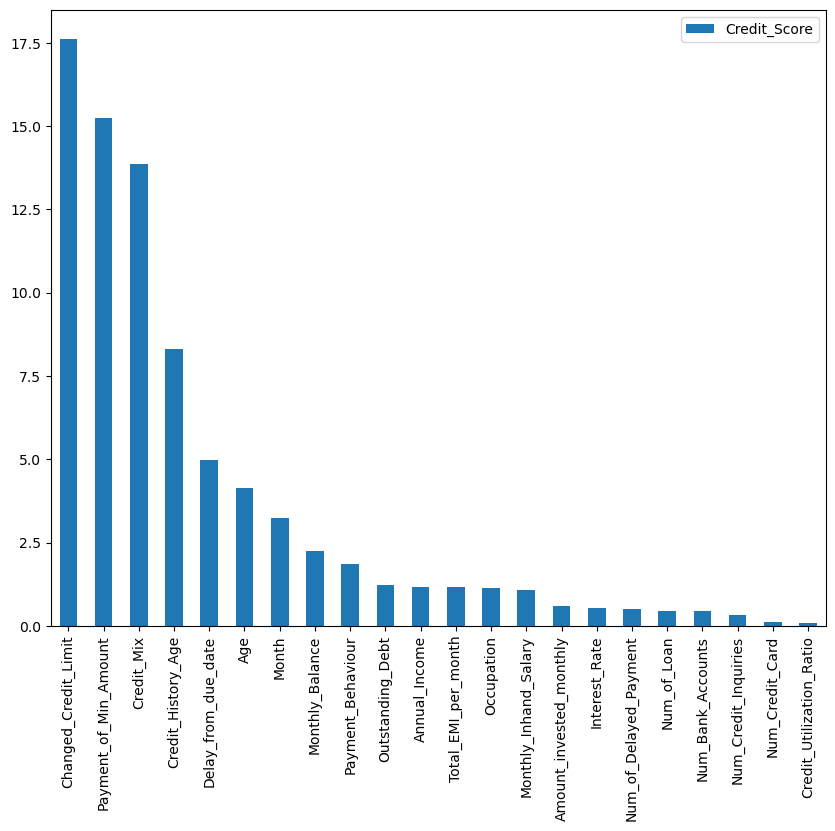

In [144]:
# Ranking

pd.DataFrame(abs(df_train.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [145]:
# Usuwanie Num_Credit_Card, Credit_Utilization_Ratio, Monthly_Inhand_Salary

zbior1 = df_train.drop(['Num_Credit_Card', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary'], axis=1)

In [148]:
zbior1

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,-0.917979,12,-0.695433,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.299176,-0.103499,...,4.0,3,-0.656944,0.615042,1,-0.530365,80.415295,3,-0.234906,0
2,2,0.035940,12,-0.695433,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.299176,-0.103499,...,4.0,1,-0.656944,0.635170,1,-0.530365,81.699521,5,-0.072321,0
3,3,-0.917979,12,-0.695433,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.170423,-0.117390,...,4.0,1,-0.656944,0.645234,1,-0.530365,199.458074,6,-1.008428,0
4,4,-0.917979,12,-0.695433,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.106046,-0.135913,...,4.0,1,-0.656944,0.655298,1,-0.530365,41.420153,2,0.016977,0
5,5,-0.917979,12,-0.695433,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-0.977292,-0.117390,...,4.0,1,-0.656944,0.665363,1,-0.530365,62.430172,0,0.008203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98285,5,-0.059452,2,-0.268517,6,21,5.0,"Student Loan, Payday Loan, Payday Loan, Person...",0.438998,-0.029410,...,8.0,0,0.640794,-1.287068,2,-0.053786,59.386080,1,-0.028518,2
98287,7,-0.059452,2,-0.268517,6,21,5.0,"Student Loan, Payday Loan, Payday Loan, Person...",0.632128,-0.043302,...,8.0,0,0.640794,-1.266940,2,-0.053786,30.430153,2,0.309895,1
98296,0,0.512900,7,0.270214,0,2510,1.0,Payday Loan,-0.912915,-0.131282,...,2.0,3,-0.830744,0.957221,1,-0.879169,232.909909,6,0.062374,2
98299,3,0.512900,7,0.270214,0,4,1.0,Payday Loan,-0.912915,-0.131282,...,2.0,1,-0.830744,0.987413,0,-0.879169,387.541439,6,-1.280922,2
